
<p><img alt="udeA logo" height="120px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="10px" vspace="0px" style="width:107px;height:152px;"></p>

# <center> <font color='0B5345'>Homework 2.3.</font> </center>

## TASK: T1.  - Reservoir
<font>
<p justify="align">
Suppose you need to gather a sample from sales at the online market place during the Christmas season. Write the code to the <em>reservoir algorithm</em> in order to gather the sample. Each sale uses an integer as id. See <a href= "https://en.wikipedia.org/wiki/Reservoir_sampling#cite_note-li-2">here </a></p>
</font>


###  I. sign in grader

In [ ]:
#. sign in
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
# Please DON'T MODIFY THIS CODE
init.course_id = "LOGICA_3.v1"
#init.course_id = "bigdata.v2"
import inspect
from local.lib.rlxmoocapi import session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L02.03", varname="student");

logging in as estiven.carmona@udea.edu.co... please wait
using course session LOGICA_3.v1::2023.2
success!! you are logged in


### II. Add your solution

In [ ]:
# function to generate a random stream
def generate_stream(size_stream):       # size_stream is the stream size.
  import random
  return random.sample(range(size_stream*10), size_stream)

In [ ]:

def reservoir(stream,size_sample):       # stream is a list, its elements will be generated by the function generate_stream
  #RESERVOIR
  import numpy as np
  import random
  ### START CODE HERE ###
  sample = []
  list_items = []                        # list to store random values assigned to j
  for i in range(0, size_sample):
    sample.append(stream[i])
  for i in range(size_sample, len(stream)):
    j = random.randint(0, i)
    if j < size_sample:
      sample[j] = stream[i]
    list_items.append(j)
  ### END CODE HERE ###
  return sample, list_items


### III. Test your solution

In [ ]:
size_stream = int(input('Ingrese el numero de elementos del stream  de entrada '))
size_sample = int(input('Ingrese el numero de elementos de la muestra '))
stream_aleatorio = generate_stream(size_stream)
sample , lista_j = reservoir(stream_aleatorio, size_sample)
sample


Ingrese el numero de elementos del stream  de entrada 30
Ingrese el numero de elementos de la muestra 6


[215, 165, 154, 222, 60, 81]

### IV. Submit your solution to the grader

In [ ]:
## Student
student.submit_task(globals(), task_id="T1");

## TASK: T2. - Coding the algorithm 3.
<font>
<p justify="align">Write the code to the <b> <font face="Comic Sans MS" color="0B5345">algorithm 3.</font> </b> It gathers a sample to study the typical behavior of the individuals in the stream. The tuple <em> < id, value > </em> identifies each element in the stream.

<center><img src="https://raw.githubusercontent.com/freddyduitama/images/master/samplig.png">
<caption></center>
<center><font color='0B5345'> <b>Figure 1: </b><br> Hash function to pick a fraction $\frac {a}{b}$ of users with respect to the population</font></center></caption>
<center><font color='0B5345'>If </font>$h(key)  \le a$  <font  color="0B5345"><b>then</b> add individual in the sample.</font>
    </center>
<br>
<b> <font face="Comic Sans MS" size = "2" color="0B5345">Algorithm 3.</font> </b>
<ul>
<li>
<font face="Comic Sans MS" size = "2">buckets <font color="922B21">:=</font> self._table_size(capacity) </font>
</li>
<li><font face="Comic Sans MS"  size = "2">h(key)<font color="922B21"> := </font> getFunctions_(self)</font>
</li>
<li align="left">
  <font face="Comic Sans MS" size = "2">
      sample_size <font color="922B21"> := </font>   m </font>
</li>
<li align="left">
  <font face="Comic Sans MS" size = "2">
      threshold <font color="91"> := </font> buckets<font color="922B21"> - </font> 1 </font>
</li>

 <li>
 <font face="Comic Sans MS" size = "2">
 <font color="922B21">for </font>each element  in stream  <font color="0B5345">( key, {value} ) </font>
 <font color="922B21">&emsp; do :</font></font>
</li>

<li>
  <font face="Comic Sans MS" color="922B21" size="2">&emsp;&emsp;if </font>
  <font face="Comic Sans MS" font size="2">( h(key) <font color="0B5345">$<$</font> threshold)</font>
<font face="Comic Sans MS"size="2">&emsp;<font color="922B21" > then  </font> &emsp; add element to sample </font>
<br>

<li>
  <font face="Comic Sans MS" size="2">
   &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;
   <font color="922B21" >else </font>&emsp;  discard element </font><br>
</li>

<li>
  <li>
<font face="Comic Sans MS" color="922B21" size="2.5">&emsp;&emsp;while </font>
<font face="Comic Sans MS" font size="2.5">( users in sample <font color="0B5345">$>$</font> sample_size)</font>
<font face="Comic Sans MS"size="2.5">&emsp;
</li>

<li>
    <font face="Comic Sans MS" size="2">&emsp;&emsp;&emsp;&emsp;
     remove elements in sample with h(user) = threshold  </font>
</li>
<li>
    <font face="Comic Sans MS" size="2">&emsp;&emsp;&emsp;&emsp;
        threshold <font color="922B21"> := </font>threshold <font color="922B21" >- </font> 1</font>
</li>
</ul>
</p>

<b>Let suppose:</b> <br>
- Population size = 10.000 users.
- Stream length =  15.000 user requests.
- sample size = 278

In [ ]:
!pip install primesieve==2.3.0

In [ ]:
# Define hash family class
# Define  an ADT and its methods
def my_solution_t2(capacity):

  # define  an ADT and its methods
  import numpy as np
  from primesieve import n_primes
  import hashlib
  class HashFamily:

    def __init__(self, capacity):
        self._buckets = n_primes(1, capacity+1)[0]                         # Bucket number.
        self._table = [None] * self._buckets
        self._a = np.random.randint(1, self._buckets-1)                          # variable a
        self._b = np.random.randint(0, self._buckets-1)                          # variable b
        self._n =  0                                                       # input size

    def get_hash(self, key):
          mapped_key = self.map_the_key(key)                              # map key to number.
          return (self._a * mapped_key + self._b) % self._buckets          # return bucket number

    def get_function(self):
      return self._a,self._b,self._buckets                                 # return constant a,b and bucket number.

    # only store collisions with the same key
    def set_item(self,bucket,key,value):                                   # store key into the bucket. Each bucket stores a linked list.
          if self._table[bucket] is None:
            self._table[bucket] = []
            collision = False
          else:
            collision = True
            for item in self._table[bucket]:
                if item[0] != key:
                    return  collision
          entry = (key,value)
          self._table[bucket].append(entry)
          self._n =  self._n + 1
          return collision

    def find_item(self,key):
          bucket = self.hash_(key)
          if self._table[bucket] is None:
              return None
          else:
              for item in self._table[bucket]:
                  if item[0] == key :
                    return bucket                                          # find key in bucket.
          return None

    def get_content(self,bucket):                                          #retrieve all entries on self._table[bucket]

          return None

    def bucket_len(self,bucket):                                           # find length of the bucket
        if  self._table[bucket] != None:
              return len(self._table[bucket])
        return 0

    def load_factor(self):
        return (self._n /  self._buckets)

    def map_the_key(self, key):
      # Calculate the hash SHA256 of the string
      sha256_hash = hashlib.sha256(key.encode()).hexdigest()
      # Convert the hash to integer
      number = int(sha256_hash, 16)

      return number

  return HashFamily(capacity)

In [ ]:
# method that generate (capacity*7) keys from vocabulary
# create a list of string keys
import numpy as np
def generate_keys(capacity):
  alphabet = {
    1:"A" , 2:"B", 3:"C", 4:"D" , 5:"E" , 6:"F" , 7:"G" , 8:"H", 9:"I", 0: "J"
     }

  lista_elementos = []
  for i in range(0, int(capacity)+5000):
    key=""
    for j in range(1,5):                                            # generate randomly 4-word keys . Universe is equal to 10^4 keys.
      l= np.random.randint(0,10)
      key = key + alphabet[l]
    lista_elementos.append(key)

  return lista_elementos

### I. ADD YOUR SOLUTION

In [ ]:
def remove_elements(ADT,threshold,sample_size,elements):              # method to remove elements from the sample into ADT
    ### START CODE HERE ###
    while elements > sample_size:
      if ADT.bucket_len(threshold) > 0:
        elements = elements - 1
      threshold = threshold - 1
    ### END CODE HERE ###
    return  elements, threshold

In [ ]:
def algorithm3(lista_elementos, samp_size, member):                 # member is an instance of the class named hash family .
    ### START CODE HERE ###
    elements = 0
    sample_size = samp_size
    _,_,minumbuckets = member.get_function()
    threshold = minumbuckets - 1
    for item in lista_elementos:
      position = member.get_hash(item)
      if position < threshold:
        if not member.set_item(position, item, "value"):
          elements = elements + 1
      if elements > sample_size:
        n_elements, n_threshold = remove_elements(member, threshold, sample_size, elements)
        elements = n_elements
        threshold = n_threshold
    ### END CODE HERE ###
    return elements, sample_size, threshold

### III. TEST YOUR SOLUTION

In [ ]:
capacity = input('Please enter the range of values into the universe: ')
try:
   val = int(capacity)
except ValueError:
    print("No.. input string is not an Integer. It's a string")
    sys.exit("program is aborted....")

member = my_solution_t2(val)

Please enter the range of values into the universe: 1000


In [ ]:
a,b,n =member.get_function()
print("function is (",a,"* key + ", b, ") module",n)

function is ( 303 * key +  144 ) module 1009


In [ ]:
elements, sample_size, threshold = algorithm3(generate_keys(val), 273, member)

In [ ]:
print(threshold, elements)

276 273


### IV. SUBMMIT YOUR SOLUTION

In [ ]:
## TEACHER
student.submit_task(globals(), task_id="T2");

## TASK: T3 plotting yor solution.
Plot the sample you gather using algorithm3. Use and modify the following code, then analyze the behavior of the algorithm. Test the algorithm using several executions and plot the answers.

In [ ]:
y =  np.zeros((threshold), dtype=int)
x =  np.zeros((threshold), dtype=int)
max = 0
for i in range(threshold):
   y[i] = member.bucketLen_(i)
   x[i] = i
   if member.bucketLen_(i) > max:
      max = member.bucketLen_(i)

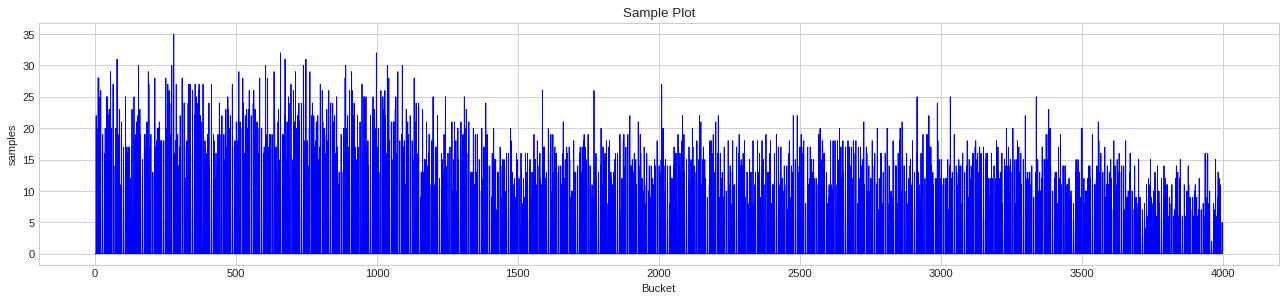

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure
figure(figsize=(20, 4), dpi=80)
style.use('seaborn-whitegrid')
plt.plot(x, y, '-', color='b',   linewidth=0.8)
plt.xlabel("Bucket")
plt.ylabel("samples");
plt.title("Sample Plot")
plt.show()

## TASK: T4. - Comparing both approaches.
<p justify="align">
<font face="Verdana" size="2.5">
3. Users send queries that consists of tuples  <em>$Q_i$=  [ user, {query, time} ]</em> and you need to know: “What fraction of the typical user’s queries were repeated over the past month?<br>
<b>Premises:</b> Suppose that the user emitted  $s$  queries once and  $d$ queries twice. To simplify the problem, assume

 - There is no search queries more than twice and
 - We wish to store only  $\frac {1}{10} ^{th}$ of users in the stream.

<font face="Verdana" size="2.5">
 Test both reservoir algorithm and Algorithm $3$ to find the sample. Compare and anlyze the two samples, see section 4.

## TASK: T5. - Probability to select a sample:

<ol> <font face="Verdana" size="2.5">
<li>If size($U$) = $n$, what is the probability that any fixed $m$-items subset of $U$ be chosen?</li>
</ol>
  </font>